In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df= pd.read_excel("covid_19.xlsx")

In [14]:
df.head()
df=df.dropna()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,2020-02-02 00:00:00,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,2020-03-02 00:00:00,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,2020-02-03 00:00:00,24,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,2020-02-03 00:00:00,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [10]:
df=df.dropna()


In [33]:

dfd=df.groupby(['Detected State']).size().reset_index(name="Count1")
dfd

,Detected State,Count1
0,Andaman and Nicobar Islands,10
1,Andhra Pradesh,44
2,Assam,1
3,Bihar,21
4,Chandigarh,15
5,Chhattisgarh,9
6,Delhi,120
7,Goa,5
8,Gujarat,74
9,Haryana,43


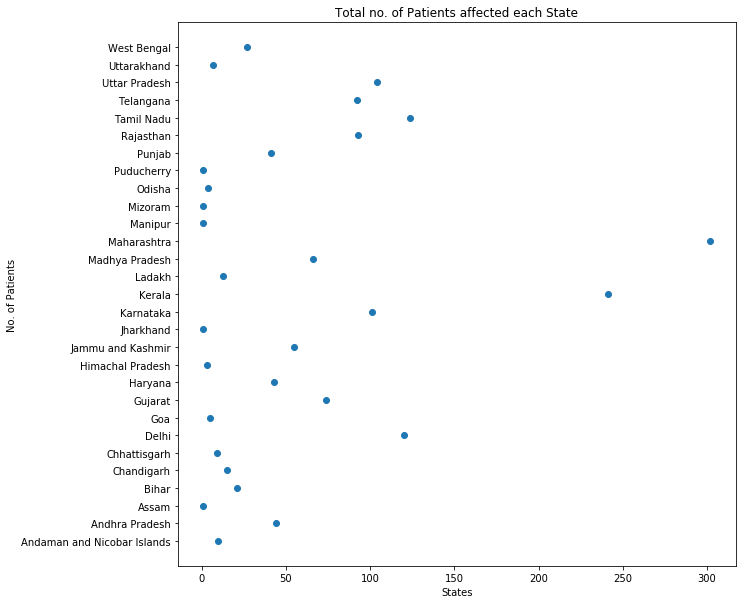

In [41]:

fig, ax1 = plt.subplots(figsize = (10,10)) 
plt.scatter(dfd['Count1'],dfd["Detected State"])
plt.xlabel("States")
plt.ylabel("No. of Patients")
plt.title("Total no. of Patients affected each State")
plt.show()

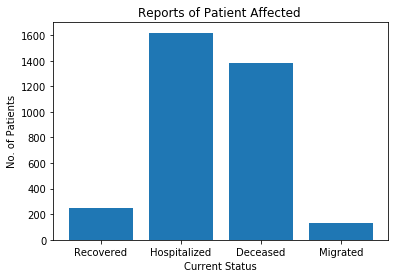

In [42]:
plt.bar(df["Current Status"],df["Patient Number"])
plt.title("Reports of Patient Affected ")
plt.xlabel("Current Status")
plt.ylabel("No. of Patients")
plt.show()

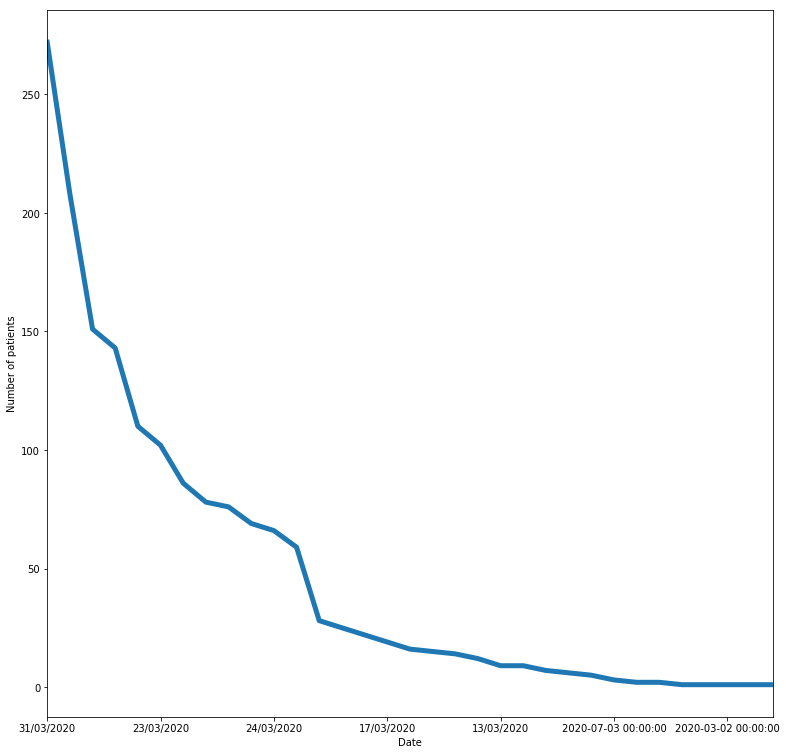

In [43]:
dt=df["Date Announced"].value_counts()
dt.plot.line(figsize=(13,13),linewidth="5")
plt.xlabel("Date")
plt.ylabel("Number of patients")
plt.show()

21       25
35       22
32       21
55       20
24       20
23       19
45       19
65       18
25       18
22       17
40       15
27       15
26       15
38       13
52       13
34       13
33       13
41       12
20       12
53       11
39       11
49       10
50       10
30       10
60       10
63       10
37       10
59        9
42        9
28        9
         ..
67        5
19        5
3         5
1         4
28-35     4
68        4
75        3
62        3
76        3
17        3
74        3
66        3
2         2
7         2
11        2
13        2
85        2
81        2
92        1
89        1
15        1
14        1
72        1
12        1
10        1
9         1
6         1
96        1
77        1
73        1
Name: Age Bracket, Length: 78, dtype: int64


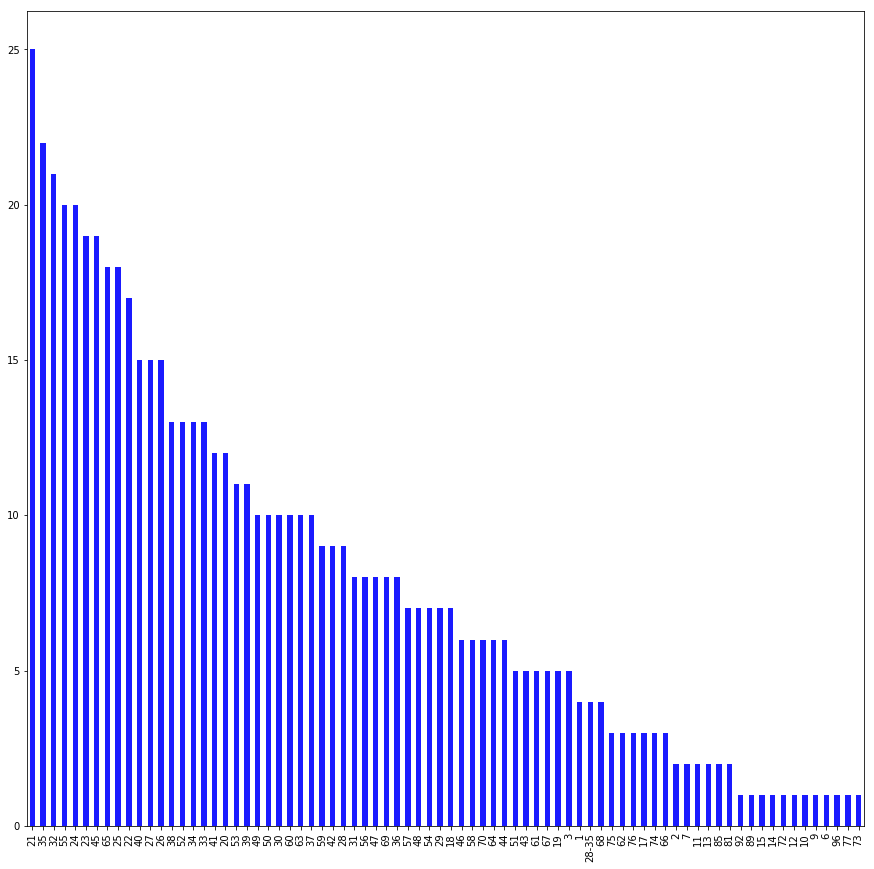

In [45]:
from matplotlib.ticker import StrMethodFormatter
df["Age Bracket"]=df["Age Bracket"].fillna("NIA")
age=df["Age Bracket"].value_counts()
age=age.drop(labels="NIA")
age.plot.bar(figsize=(15,15),color='#1a1aff')
print(age)
plt.show()

['India' 'Italy' 'Canada' 'United Kingdom' 'Phillipines' 'Indonesia' nan
 'Thailand' 'United States of America' 'Indian']


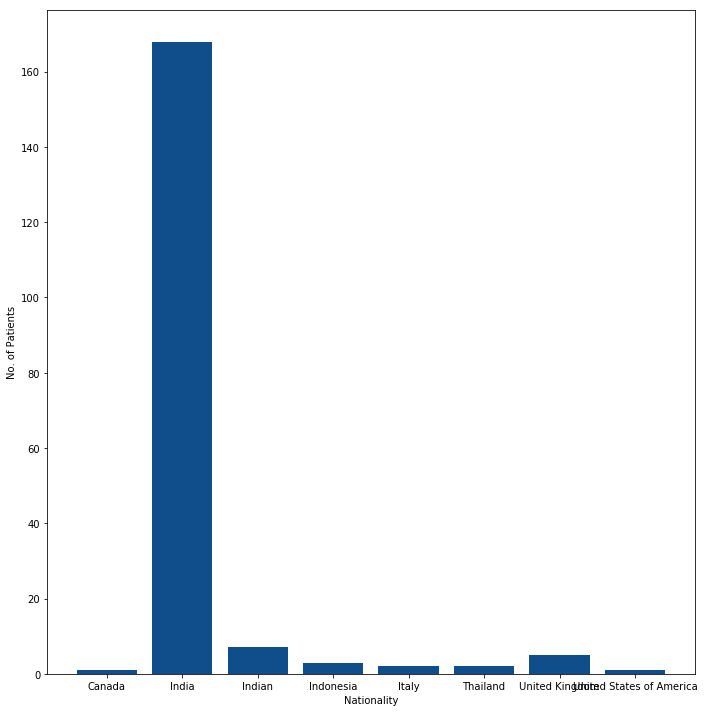

In [46]:
nt=df['Nationality']


a=df.Nationality.unique()
print(a)
a=df.groupby(['Nationality','Gender']).size().reset_index(name="Count")
fig, ax1 = plt.subplots(figsize = (10,10)) 
plt.bar(a["Nationality"],a['Count'],color="#104E8B")
plt.xlabel("Nationality")
plt.ylabel("No. of Patients")

plt.tight_layout()
plt.show()

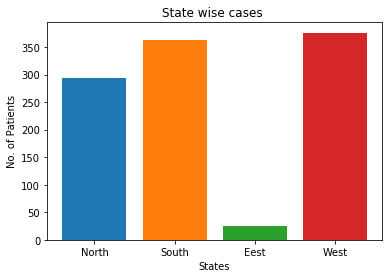

In [47]:
stt=df['Detected State']

north={"Rajastan","Punjab","Delhi","Arunachal Pradesh","Uttarakhand","Haryana","Jammu and Kashmir","Manipur""Uttar Pradesh","Ladakh","Chandigarh"}
nt=0
south={"Kerla","Telangana","Tamil Nadu","Karnataka","Puducherry","Andhra Pradesh"}
st=0
west={"Maharashtra","Gujarat"}
wt=0
east={"Odisha","Bihar"}
et=0
for x in stt:
    if x in north:
        nt+=1
    elif x in south:
        st+=1
    elif x in west:
        wt+=1
    elif x in east:
        et+=1

#stts={"North","South","East","West"}
plt.bar("North",nt)
plt.bar("South",st)
plt.bar("Eest",et)
plt.bar("West",wt)
plt.title("State wise cases ")
plt.xlabel("States")
plt.ylabel("No. of Patients")
plt.show()